In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def distance(p1, p2):  # p1 et p2 sont des triplets de la forme [h,s,v]
    r1 = (p1[1] / 255) * (p1[2] / 255)
    theta1 = (p1[0] / 180) * 2 * np.pi
    z1 = p1[2] / 255 - 1
    x1 = r1 * np.cos(theta1)
    y1 = r1 * np.sin(theta1)
    r2 = (p2[1] / 255) * (p2[2] / 255)
    theta2 = (p2[0] / 180) * 2 * np.pi
    z2 = p2[2] / 255 - 1
    x2 = r2 * np.cos(theta2)
    y2 = r2 * np.sin(theta2)

    hsv_color1 = np.uint8([[[p1[0], p1[1], p1[2]]]])
    hsv_color2 = np.uint8([[[p2[0], p2[1], p2[2]]]])
    bgr_color1 = cv2.cvtColor(hsv_color1, cv2.COLOR_HSV2BGR)
    rgb_color1 = cv2.cvtColor(bgr_color1, cv2.COLOR_BGR2RGB)
    bgr_color2 = cv2.cvtColor(hsv_color2, cv2.COLOR_HSV2BGR)
    rgb_color2 = cv2.cvtColor(bgr_color2, cv2.COLOR_BGR2RGB)
    plt.figure(1)
    plt.imshow([[rgb_color1[0][0],rgb_color2[0][0]]])
    plt.show()

    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2 + (z1 - z2) ** 2)

Matplotlib is building the font cache; this may take a moment.


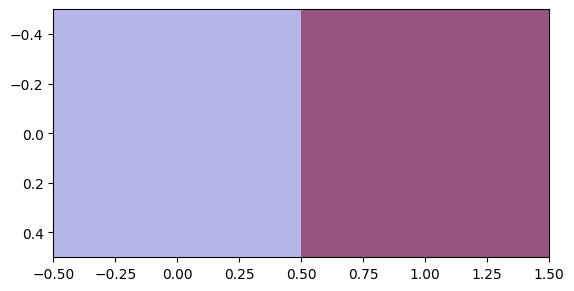

0.4469683984664931


In [2]:
print(distance([120, 57, 235], [160, 110, 150]))

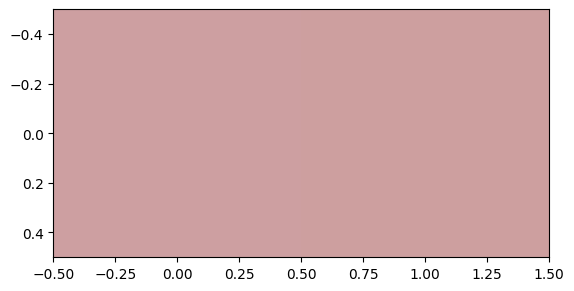

0.006272398899489641


In [3]:
print(distance([179, 57, 205], [0, 57, 205]))

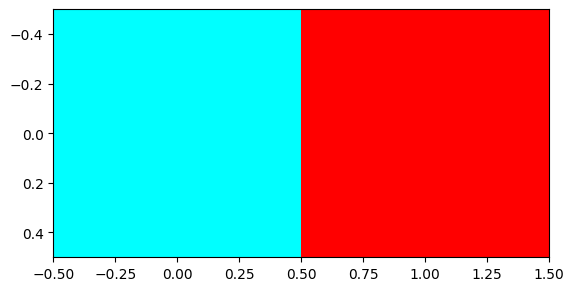

2.0


In [4]:
print(distance([90, 255, 255], [0, 255, 255]))

In [24]:
import numpy as np
from skimage import color
import matplotlib.pyplot as plt


def couleur_distance_rgb(c_1, c_2):
    # Conversion en [0,1]
    c1 = np.array(c_1) / 255
    c2 = np.array(c_2) / 255

    # Convertir RGB → Lab
    lab1 = color.rgb2lab([[c1]])[0][0]
    lab2 = color.rgb2lab([[c2]])[0][0]

    # Distance euclidienne dans l'espace Lab (≈ perceptuelle)
    distance = np.linalg.norm(lab1 - lab2)

    #affichage
    plt.imshow([[c_1,c_2]])
    plt.show()

    return distance


[ 37.63680539 -30.93357259  33.34364161]


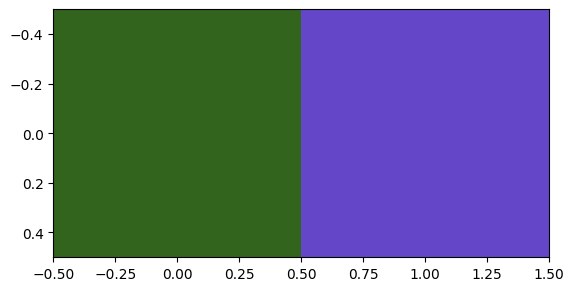

Distance perceptuelle entre [50, 100, 30] et [100, 70, 200] = 123.11


In [23]:
c1 = [50, 100, 30]
c2 = [100, 70, 200]

d = couleur_distance_rgb(c1, c2)
print(f"Distance perceptuelle entre {c1} et {c2} = {d:.2f}")


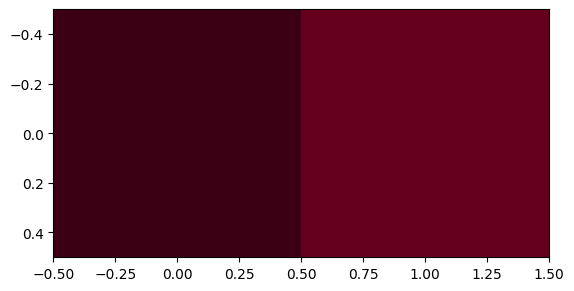

Distance perceptuelle entre [60, 0, 20] et [100, 0, 30] = 17.50


In [19]:
c1 = [60, 0, 20]     # rouge
c2 = [100,0 , 30]     # vert

d = couleur_distance_rgb(c1, c2)
print(f"Distance perceptuelle entre {c1} et {c2} = {d:.2f}")


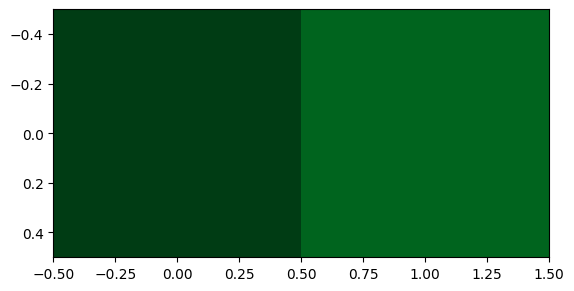

Distance perceptuelle entre [0, 60, 20] et [0, 100, 30] = 23.32


In [21]:
c1 = [0, 60, 20]     # rouge
c2 = [0,100 , 30]     # vert

d = couleur_distance_rgb(c1, c2)
print(f"Distance perceptuelle entre {c1} et {c2} = {d:.2f}")
